In [15]:

# Import Packages
import pandas as pd
#import matplotlib.pyplot  as plt
#from PIL import Image
from pathlib import Path
#import imagesize
import numpy as np
#from resizeimage import resizeimage
import pickle 
import pyvips
from pyvips import Image
import tensorflow as tf

In [2]:
#https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
    #accessed 2023_09_02
# Identify Image Resolutions

root = '/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/'
# Get the Image Resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs = imgs_jpeg + imgs_jpg + imgs_png
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)


In [3]:
# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 7500


,FileName,Size,Width,Height,Aspect Ratio
0,2839.jpeg,"(176, 320)",176,320,0.55
1,1716.jpeg,"(98, 320)",98,320,0.31
2,723.jpeg,"(320, 185)",320,185,1.73
3,4514.jpeg,"(320, 96)",320,96,3.33
4,6529.jpeg,"(98, 320)",98,320,0.31


Text(0, 0.5, 'Height')

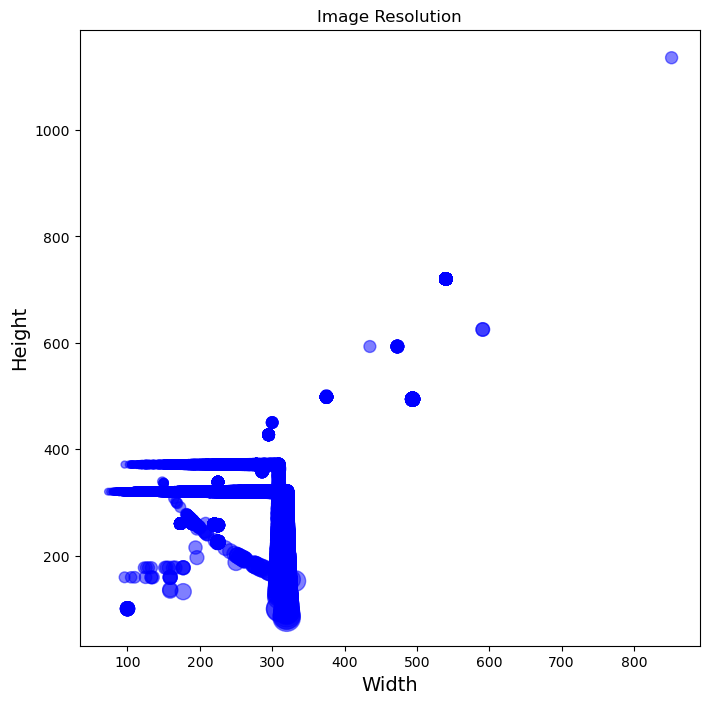

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [5]:
img_meta_df[img_meta_df['Height'] > 1000]

,FileName,Size,Width,Height,Aspect Ratio
5772,3861.jpeg,"(852, 1136)",852,1136,0.75


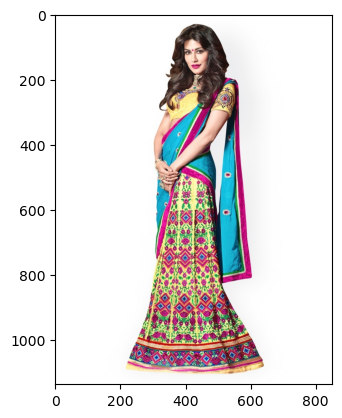

In [15]:
img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/3861.jpeg')
plt.imshow(img)

In [6]:

arrs_val = []
arrs_val_gray = []
not_found = []
for i in range(7500):
    
    try:
        
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.jpeg')
        
        img = img.resize((300,300))
        img = img.convert('RGB')
        
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_300x300/{i}.jpeg')
        #resized_imgs_val.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
       
    except:
        
        not_found.append(i)

In [7]:
len(arrs_val), len(arrs_val_gray), len(not_found)

(7019, 7019, 481)

In [8]:
missing = []
for i in not_found:
    try:
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.jpg')
        img = img.resize((300,300))
        img = img.convert('RGB')
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_64x64/{i}.jpg')
        #resized_imgs_val.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
    except:
        missing.append(i)

In [9]:
len(missing)

3

In [10]:
for i in missing:
    try:
        img = Image.open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.png')
        img = img.resize((300,300))
        img = img.convert('RGB')
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/train_resized_32x32/{i}.png')
        #resized_imgs_train.append(img)
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val.append(arr)
        img = img.convert('L')
        arr = np.array(img)
        arr = arr / 255.0
        arrs_val_gray.append(arr)
    except:
        print(i)

In [11]:
len(arrs_val), len(arrs_val_gray)

(7500, 7500)

In [12]:
with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300', 'wb') as fp:   
    pickle.dump(arrs_val, fp)

In [13]:
with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300_gray', 'wb') as fp:   
    pickle.dump(arrs_val_gray, fp)

In [16]:
not_found = []
for i in range(91166):
    try:
        
        #img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train/{i}.jpeg', 300, height=300, size='force')
        arr = np.array(img)
        arr = arr / 255.0
        arrs_train.append(arr)
        #img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_300/{i}.tif')
        
    except:
        not_found.append(i)

In [17]:
len(not_found)

91166

In [7]:
missing = []
for i in not_found:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train/{i}.png', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_300/{i}.tif')
        
    except:
        missing.append(i)

In [8]:
len(missing)

3799

In [9]:
for i in missing:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train/{i}.jpg', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_300/{i}.tif')
        
    except:
       print(i)

Now validation set

In [21]:
not_found = []
for i in range(7500):
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.jpeg', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300/{i}.tif')
        
    except:
        not_found.append(i)

In [22]:
len(not_found)

481

In [23]:
missing = []
for i in not_found:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.jpg', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300/{i}.tif')
    except:
        missing.append(i)

In [24]:
len(missing)

3

In [25]:
for i in missing:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val/{i}.png', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300/{i}.tif')
        
    except:
       print(i)

Now test set

In [7]:
not_found = []
for i in range(7500):
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test/{i}.jpeg', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test_300/{i}.tif')
        
    except:
        not_found.append(i)

In [8]:
len(not_found)

508

In [9]:
missing = []
for i in not_found:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test/{i}.jpg', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test_300/{i}.tif')
    except:
        missing.append(i)

In [10]:
len(missing)

4

In [11]:
for i in missing:
    try:
        
        img = pyvips.Image.thumbnail(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test/{i}.png', 300, height=300, size='force')
       
        img.write_to_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test_300/{i}.tif')
        
    except:
       print(i)

In [13]:


for i in range(65000, 75000):
        img = Image.new_from_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_300/{i}.tif')
        #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_300x300/{i}.jpeg')
        #resized_imgs_val.append(img)
        x = np.array(img)
        x = x / 255.0
       
        with open(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_300_75000/train_300_{i}', 'wb') as fp:   
            pickle.dump(x, fp) 
        

In [12]:
len(xtrain_tens_arr)

91166

In [17]:
xval_tens_arr = []

for i in range(7500):
    img = Image.new_from_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_300/{i}.tif')
    #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_300x300/{i}.jpeg')
    #resized_imgs_val.append(img)
    x = np.array(img)
    x = x / 255.0
    a = tf.constant(x)
    xval_tens_arr.append(a) 

In [8]:
len(xval_tens_arr)

7500

In [9]:
xval_tens_arr[0]

<tf.Tensor: shape=(320, 89, 3), dtype=float64, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])>

In [18]:
xtest_tens_arr = []

for i in range(7500):
    img = Image.new_from_file(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test_300/{i}.tif')
    #img.save(f'/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/processed/val_resized_300x300/{i}.jpeg')
    #resized_imgs_val.append(img)
    x = np.array(img)
    x = x / 255.0
    a = tf.constant(x)
    xtest_tens_arr.append(a) 

In [19]:
len(xtest_tens_arr)

7500

In [ ]:
#with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/size_300/train_300', 'wb') as fp:   
    #pickle.dump(xtrain_tens_arr, fp)

In [21]:
#with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/size_300/test_300', 'wb') as fp:   
    #pickle.dump(xtest_tens_arr, fp)

In [22]:
#with open('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/size_300/val_300', 'wb') as fp:   
    #pickle.dump(xval_tens_arr, fp)

In [ ]:
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
predictions = probability_model.predict(test_images)


In [ ]:
np.argmax(predictions[0])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()